Thông tin sinh viên
MSSV: 22520903
Họ tên: Trần Hoàng Hà My
Khoa: KTMT
Lớp: DS102.P21.2

Các thư viện cần thiết

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as SklearnLogistic
from sklearn.preprocessing import OneHotEncoder

### Data Preprocessing

In [133]:
data = pd.read_csv("data.csv", sep=";")
print("Top 5 rows of the data:")
data.head()

Top 5 rows of the data:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [134]:
# 2. Kiểm tra missing values (nếu có)
print("Missing values per column:")
data.isna().sum()

Missing values per column:


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Mã hóa biến mục tiêu (Target)

In [135]:
def encode_target(value: str) -> int:
    if value == "Enrolled" or value == "Dropout":
        return 0
    return 1

In [136]:
print(data["Target"].unique())


['Dropout' 'Graduate' 'Enrolled']


In [137]:
data["Target"] = data["Target"].apply(encode_target)
print(data["Target"].unique())
print("\nData after encoding target:")
data.head()

[0 1]

Data after encoding target:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


Standarlization

In [138]:
continuous_columns = [
    "Previous qualification (grade)",
    "Admission grade",
    "Unemployment rate",
    "GDP"
]
for col in continuous_columns:
    data[col] = (data[col] - data[col].mean()) / (data[col].std() + 1e-6)

In [139]:
# Các biến rời rạc: các cột không nằm trong continuous_columns và không phải Target
all_columns = data.columns.tolist()
discrete_columns = [col for col in all_columns if col not in continuous_columns + ["Target"]]

In [140]:
print("\nContinuous columns:", continuous_columns)
print("Discrete columns:", discrete_columns)


Continuous columns: ['Previous qualification (grade)', 'Admission grade', 'Unemployment rate', 'GDP']
Discrete columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',

In [141]:
print(data[continuous_columns].describe())

       Previous qualification (grade)  Admission grade  Unemployment rate  \
count                    4.424000e+03     4.424000e+03       4.424000e+03   
mean                    -3.557532e-16    -9.745068e-16      -5.942604e-17   
std                      9.999999e-01     9.999999e-01       9.999996e-01   
min                     -2.852014e+00    -2.208128e+00      -1.488874e+00   
25%                     -5.772764e-01    -6.268553e-01      -8.131607e-01   
50%                      3.690279e-02    -6.063522e-02      -1.749869e-01   
75%                      5.600925e-01     5.401105e-01       8.761227e-01   
max                      4.351322e+00     4.351738e+00       1.739534e+00   

                GDP  
count  4.424000e+03  
mean   1.043971e-17  
std    9.999996e-01  
min   -1.789464e+00  
25%   -7.497870e-01  
50%    1.401058e-01  
75%    7.877010e-01  
max    1.545431e+00  


In [142]:
# Áp dụng one-hot encoding cho các biến rời rạc
data_encoded = pd.get_dummies(data, columns=discrete_columns, drop_first=True)
print("\nColumns after one-hot encoding:")
print(data_encoded.columns.tolist())


Columns after one-hot encoding:
['Previous qualification (grade)', 'Admission grade', 'Unemployment rate', 'GDP', 'Target', 'Marital status_2', 'Marital status_3', 'Marital status_4', 'Marital status_5', 'Marital status_6', 'Application mode_2', 'Application mode_5', 'Application mode_7', 'Application mode_10', 'Application mode_15', 'Application mode_16', 'Application mode_17', 'Application mode_18', 'Application mode_26', 'Application mode_27', 'Application mode_39', 'Application mode_42', 'Application mode_43', 'Application mode_44', 'Application mode_51', 'Application mode_53', 'Application mode_57', 'Application order_1', 'Application order_2', 'Application order_3', 'Application order_4', 'Application order_5', 'Application order_6', 'Application order_9', 'Course_171', 'Course_8014', 'Course_9003', 'Course_9070', 'Course_9085', 'Course_9119', 'Course_9130', 'Course_9147', 'Course_9238', 'Course_9254', 'Course_9500', 'Course_9556', 'Course_9670', 'Course_9773', 'Course_9853', 'C

Loại bỏ các cột đồng tuyến tính (colinear) ---

In [143]:
# Lấy danh sách các cột số (numeric), bao gồm cả Target
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
# Loại bỏ biến mục tiêu khỏi danh sách để tính tương quan giữa các features
target_col = "Target"
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

In [144]:
print(data["Target"].unique())

[0 1]


In [145]:
# Tính ma trận tương quan (absolute correlation)
corr_matrix = data[numeric_cols].corr().abs()

colinear_threshold = 0.85  # Ngưỡng đồng tuyến tính
to_remove = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > colinear_threshold:
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            # So sánh hệ số tương quan với biến mục tiêu
            corr_i = abs(data[col_i].corr(data[target_col]))
            corr_j = abs(data[col_j].corr(data[target_col]))
            # Loại bỏ biến có mức tương quan với Target thấp hơn
            if corr_i < corr_j:
                to_remove.add(col_i)
            else:
                to_remove.add(col_j)

print("\nCác biến đồng tuyến tính cần loại bỏ:")
print(to_remove)


Các biến đồng tuyến tính cần loại bỏ:
{'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (approved)', "Father's occupation"}


In [146]:
# Các biến số còn lại sau khi loại bỏ colinear
selected_numeric = [col for col in numeric_cols if col not in to_remove]
print("\nCác biến còn lại sau khi loại bỏ đồng tuyến tính:")
print(selected_numeric)


Các biến còn lại sau khi loại bỏ đồng tuyến tính:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [147]:
print(data["Target"].unique())


[0 1]


In [148]:
important_features = [
    "Previous qualification (grade)",
    "Admission grade",
    "Tuition fees up to date",
    "Scholarship holder",
    "Age at enrollment",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Application mode",
    "Course",
    "Daytime/evening attendance",
    "GDP"
]

In [149]:
# Giữ lại các biến quan trọng nếu chúng có trong selected_numeric
final_features = [feat for feat in important_features if feat in selected_numeric]
print("\nCác biến quan trọng được chọn (final features):")
print(final_features)


Các biến quan trọng được chọn (final features):
['Previous qualification (grade)', 'Admission grade', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Application mode', 'Course', 'GDP']


In [150]:
# Tạo DataFrame cuối cùng chứa các features và biến mục tiêu
final_data = data[final_features + [target_col]].copy()

In [151]:
target = final_data["Target"].values  # Hình dạng (n, )
features = final_data.drop(columns=["Target"])

In [152]:
print(data["Target"].unique())


[0 1]


In [153]:
print(target)

[0 1 0 ... 0 1 1]


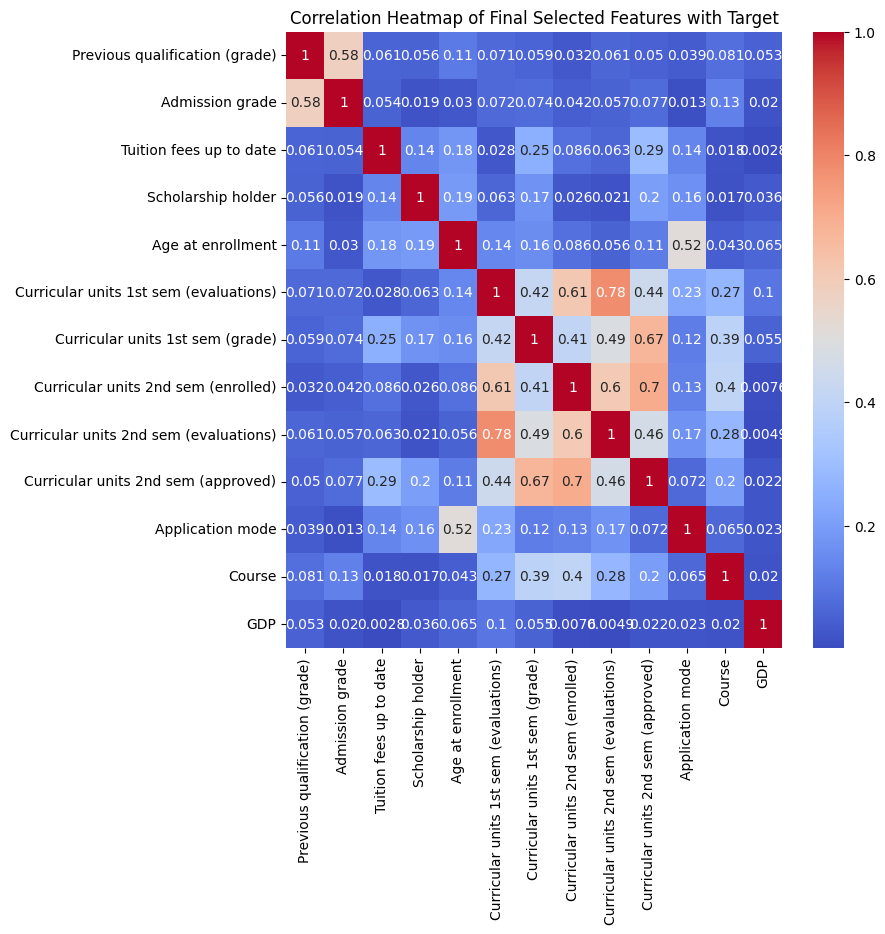

In [154]:
# Trực quan hóa ma trận tương quan của các biến cuối cùng
final_corr_matrix = features.corr().abs()
plt.figure(figsize=(8, 8))
sns.heatmap(final_corr_matrix, annot=True, cmap="coolwarm", 
            xticklabels=final_corr_matrix.columns, 
            yticklabels=final_corr_matrix.columns)
plt.title("Correlation Heatmap of Final Selected Features with Target")
plt.show()

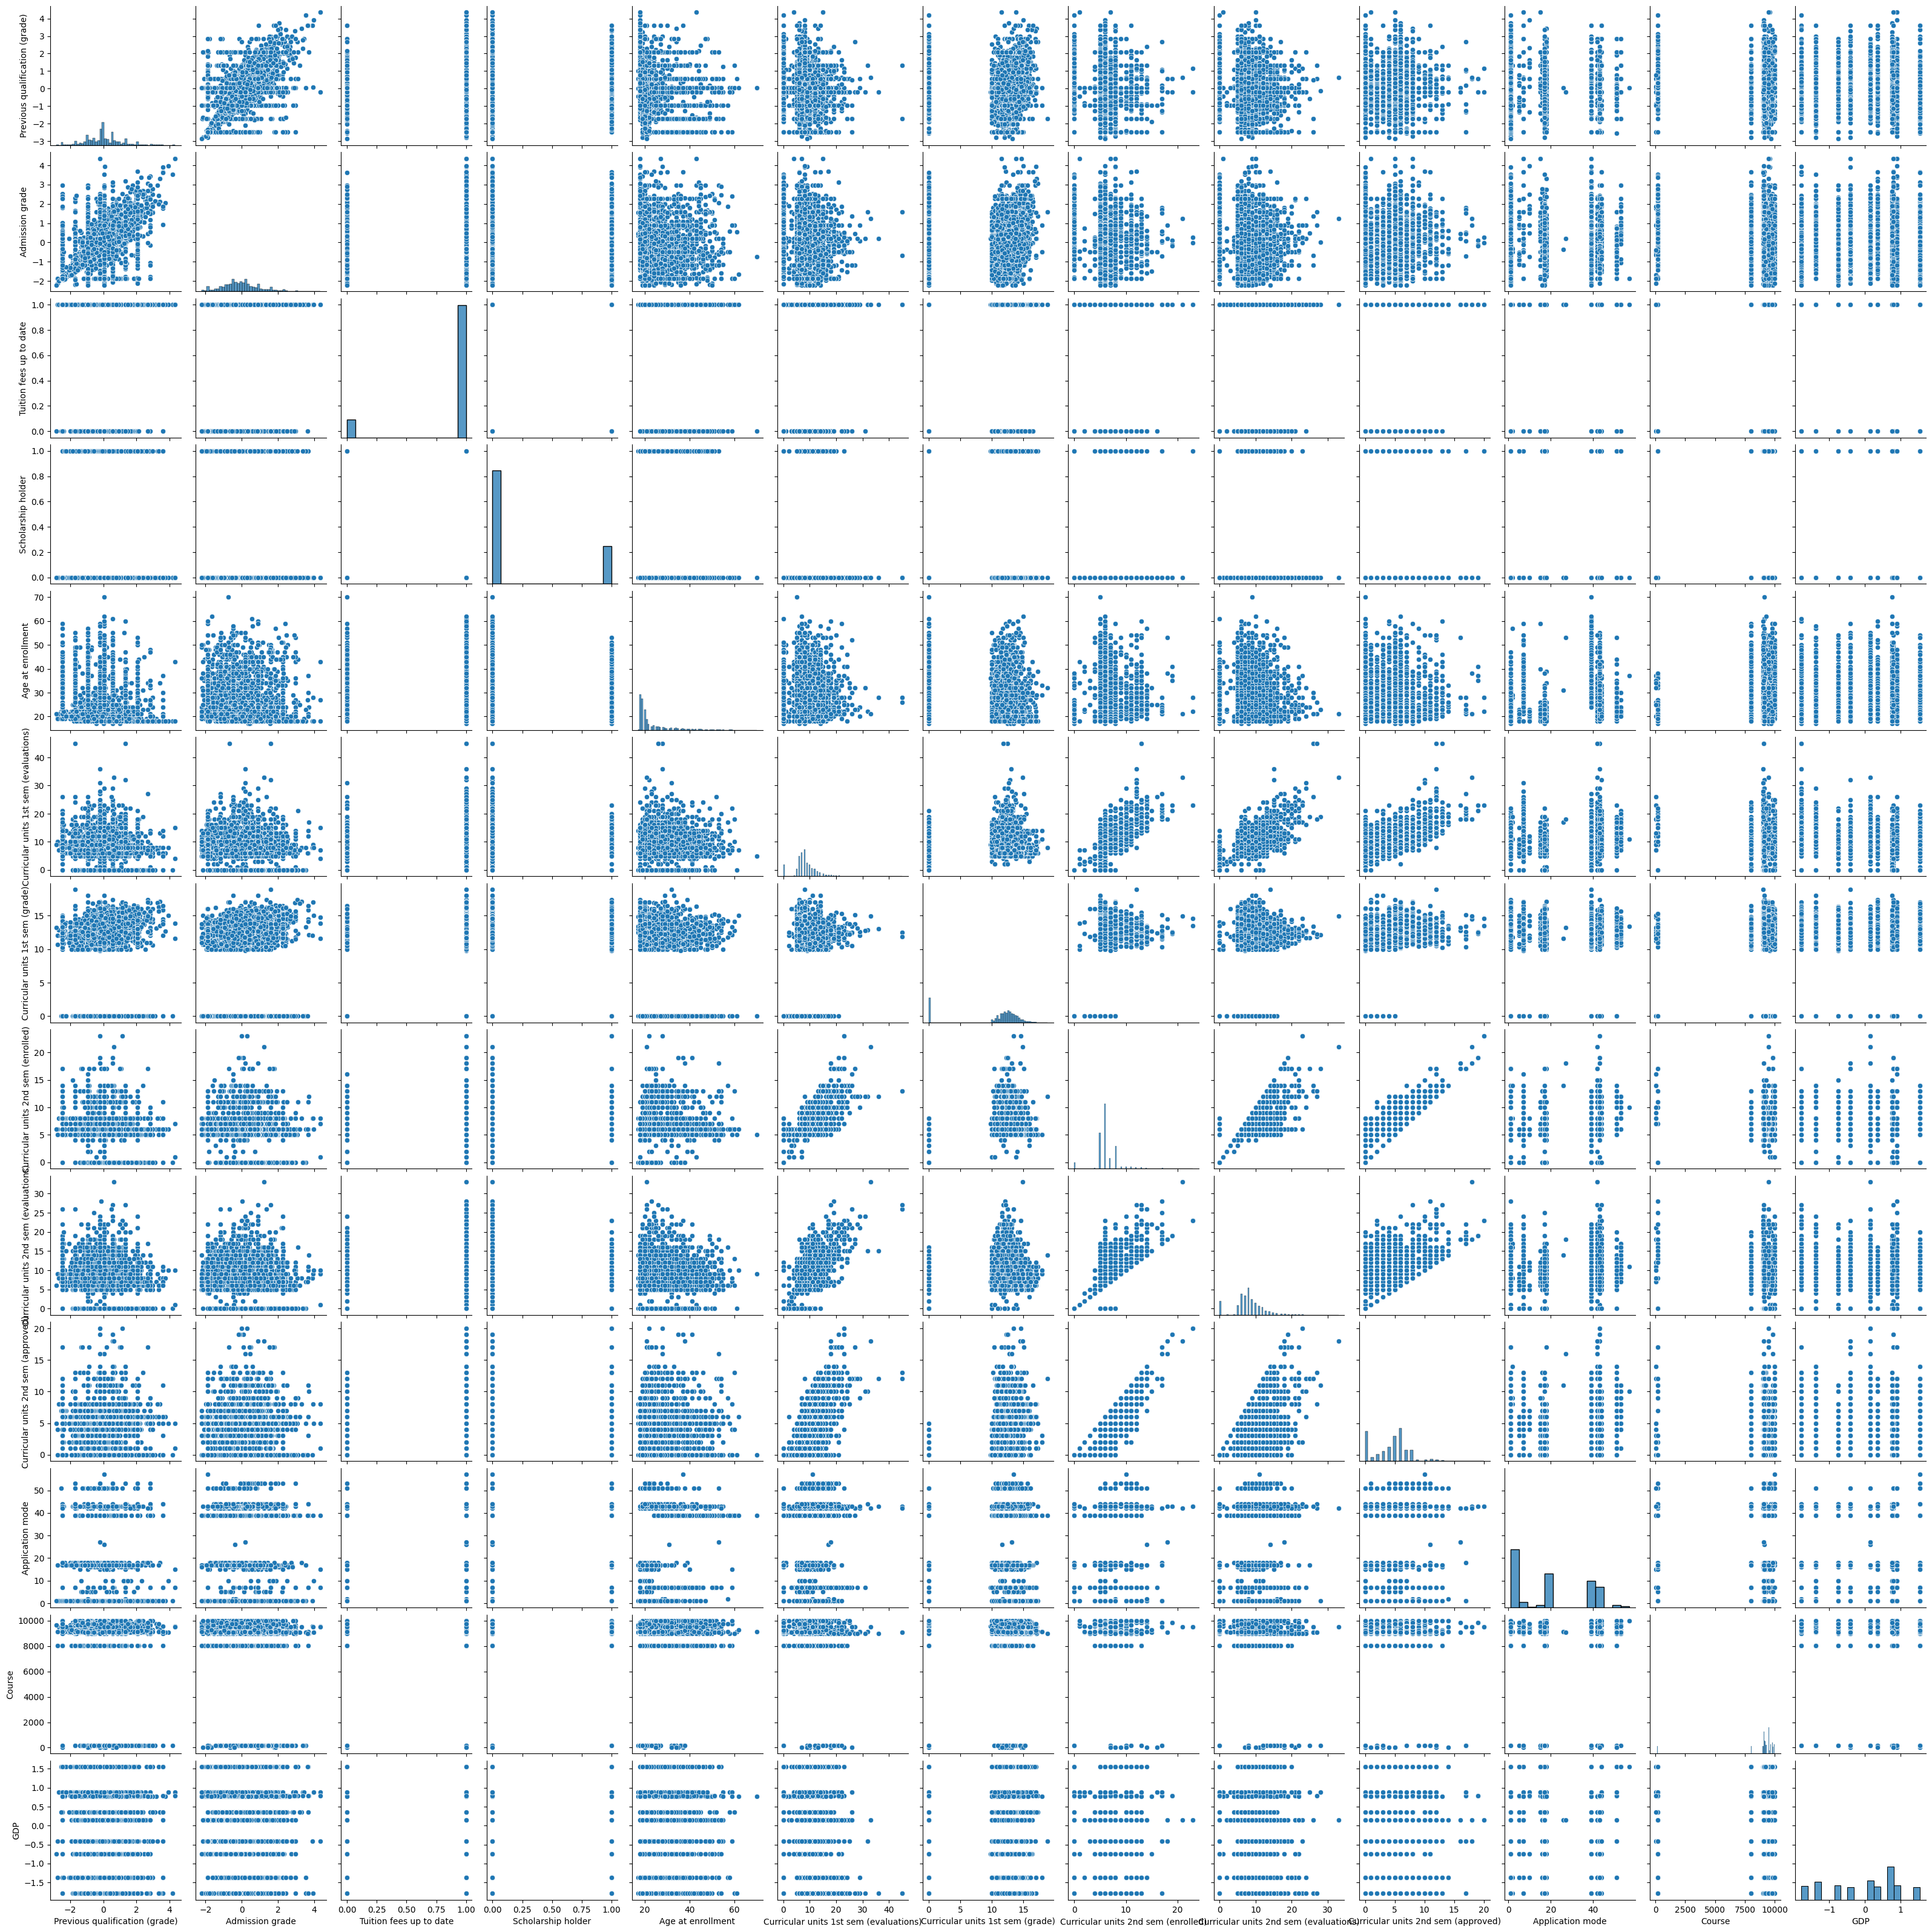

In [155]:
# 5. Trực quan hóa dữ liệu (Pairplot và Heatmap)
sns.pairplot(features)
plt.show()

Tạo dữ liệu đầu vào cho mô hình Logistic Regression (Custom)

Nomalization

In [156]:
# Xác định danh sách cột cần chuẩn hóa (tất cả trừ Target)
features = [col for col in final_data.columns if col != "Target"]

# Sao chép dữ liệu để chuẩn hóa
normalized_data = final_data.copy()

# Tính mean và std
mean = normalized_data[features].mean()
std = normalized_data[features].std()

# Tránh lỗi chia cho 0
std[std == 0] = 1

# Áp dụng Z-score normalization
normalized_data[features] = (normalized_data[features] - mean) / std

In [157]:
# Lấy features và target từ final_data
X_final = normalized_data.drop(columns=[target_col]).to_numpy()
y_final = normalized_data[target_col].to_numpy().reshape(-1, 1)

# Thêm cột bias (với giá trị 1) vào X_final
# Vì yêu cầu nói "thêm bias", ta thêm cột bias bên ngoài (và không xử lý bias trong mô hình)
n_samples = X_final.shape[0]
X_bias = np.hstack((np.ones((n_samples, 1)), X_final))

print("\nShape of X_bias:", X_bias.shape)
print("Shape of y_final:", y_final.shape)


Shape of X_bias: (4424, 14)
Shape of y_final: (4424, 1)


### Assignment 1
Sử dụng NumPy để xây dựng mô hình Logistic Regression, huấn luyện bằng Gradient Descent, gộp ba lớp thành hai lớp (graduate và non-graduate), đánh giá mô hình và trực quan hóa hàm loss.

In [158]:
class LogisticRegression:
    def __init__(self, epoch: int, lr: float):
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []  # Sửa lỗi: sử dụng '=' thay vì '-'
    
    def sigmoid(self, z: np.ndarray):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray):
        # Thêm epsilon để tránh log(0)
        epsilon = 1e-6
        return -(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon)).mean()
    
    def accuracy(self, y: np.ndarray, y_hat: np.ndarray):
        # Đối với bài toán phân loại nhị phân, chuẩn hóa y_hat theo ngưỡng 0.5
        y_pred_labels = (y_hat >= 0.5).astype(int)
        return (y_pred_labels == y).mean()
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        n = X.shape[0]
        d = X.shape[1]
        # Khởi tạo theta (bao gồm bias nếu muốn, ở đây ta không thêm cột bias ngoài)
        self.theta = np.zeros((d, 1))
        
        for e in tqdm(range(self.epoch), desc="Training Logistic Regression"):
            # Forward: tính dự đoán
            z = np.matmul(X, self.theta)
            y_hat = self.sigmoid(z)
            
            # Backward: tính gradient và cập nhật theta
            gradient = (1 / n) * np.matmul(X.T, (y_hat - y))
            self.theta -= self.lr * gradient
            
            # Tính loss và accuracy để theo dõi
            loss = self.loss_fn(y, y_hat)
            acc = self.accuracy(y, y_hat)
            self.losses.append(loss)
            self.metrics.append(acc)
            
    def predict(self, X: np.ndarray):
        z = np.matmul(X, self.theta)
        y_hat = self.sigmoid(z)
        return y_hat


Huấn luyện và đánh giá mô hình Logistic Regression Custom

In [159]:
# Chia dữ liệu 80/20
X_train, X_test, y_train, y_test = train_test_split(X_bias, y_final, test_size=0.2, random_state=42)
logistic_reg = LogisticRegression(epoch=100, lr=0.75)
logistic_reg.fit(X_train, y_train)
y_pred_logistic = logistic_reg.predict(X_test)
print("Custom Logistic Regression Loss: {:.4f}".format(logistic_reg.loss_fn(y_test, y_pred_logistic)))
print("Custom Logistic Regression Accuracy: {:.4f}".format(logistic_reg.accuracy(y_test, y_pred_logistic)))

Training Logistic Regression: 100%|██████████| 100/100 [00:00<00:00, 583.37it/s]

Custom Logistic Regression Loss: 0.3783
Custom Logistic Regression Accuracy: 0.8282


Custom Logistic Regression Loss: 0.3783
Custom Logistic Regression Accuracy: 0.8282

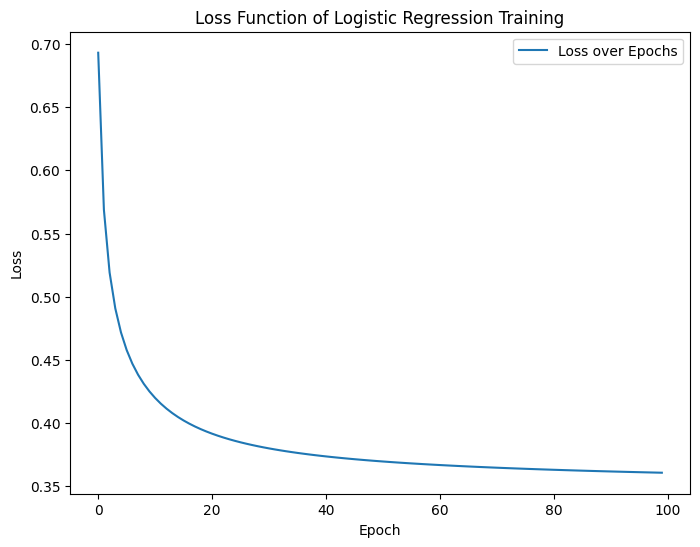

In [160]:
plt.figure(figsize=(8, 6))
plt.plot(logistic_reg.losses, label="Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Function of Logistic Regression Training")
plt.legend()
plt.show()

Softmax Regression

In [161]:
class SoftmaxRegression:
    def __init__(self, epoch: int, lr: float):
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
        
    def softmax(self, z: np.ndarray):
        # Tính softmax theo từng hàng
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray):
        # Giả sử y được one-hot encode
        epsilon = 1e-6
        return -np.mean(np.sum(y * np.log(y_hat + epsilon), axis=1))
    
    def accuracy(self, y: np.ndarray, y_hat: np.ndarray):
        # Tính accuracy dựa trên nhãn dự đoán
        y_pred_labels = np.argmax(y_hat, axis=1)
        y_true_labels = np.argmax(y, axis=1)
        return np.mean(y_pred_labels == y_true_labels)
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        n = X.shape[0]
        d = X.shape[1]
        n_classes = y.shape[1]
        self.theta = np.zeros((d, n_classes))
        
        for e in tqdm(range(self.epoch), desc="Training Softmax Regression"):
            # Forward
            z = np.matmul(X, self.theta)
            y_hat = self.softmax(z)
            
            # Backward
            gradient = (1 / n) * np.matmul(X.T, (y_hat - y))
            self.theta -= self.lr * gradient
            
            # Evaluating
            loss = self.loss_fn(y, y_hat)
            acc = self.accuracy(y, y_hat)
            self.losses.append(loss)
            self.metrics.append(acc)
            
    def predict(self, X: np.ndarray):
        z = np.matmul(X, self.theta)
        return self.softmax(z)

In [162]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y.reshape(-1)]

In [163]:
 # Chuyển target sang one-hot encoding (với 2 lớp)
y_onehot = one_hot_encode(target, 2)  # shape (n_samples, 2)

In [164]:
# Chia dữ liệu cho Softmax Regression (sử dụng cùng X_np và one-hot encoded y)
X_train_soft, X_test_soft, y_train_soft, y_test_soft = train_test_split(X_bias, y_onehot, test_size=0.2, random_state=42)

# Huấn luyện mô hình Softmax Regression sử dụng NumPy
softmax_reg_np = SoftmaxRegression(lr=0.05, epoch=500)
softmax_reg_np.fit(X_train_soft, y_train_soft)

y_pred_soft_np = softmax_reg_np.predict(X_test_soft)
# Chuyển các dự đoán softmax thành nhãn dự đoán (lớp có xác suất cao nhất)
y_pred_soft_labels = np.argmax(y_pred_soft_np, axis=1)
y_true_soft = np.argmax(y_test_soft, axis=1)
accuracy_soft_np = np.mean(y_pred_soft_labels == y_true_soft)
print("Custom Logistic Regression Loss: {:.4f}".format(softmax_reg_np.loss_fn(y_test_soft, y_pred_soft_np)))
print("Assignment 2 - Custom Softmax Regression Accuracy: {:.4f}".format(accuracy_soft_np))


Training Softmax Regression:   0%|          | 0/500 [00:00<?, ?it/s]

Training Softmax Regression: 100%|██████████| 500/500 [00:01<00:00, 383.66it/s]

Custom Logistic Regression Loss: 0.3821
Assignment 2 - Custom Softmax Regression Accuracy: 0.8271


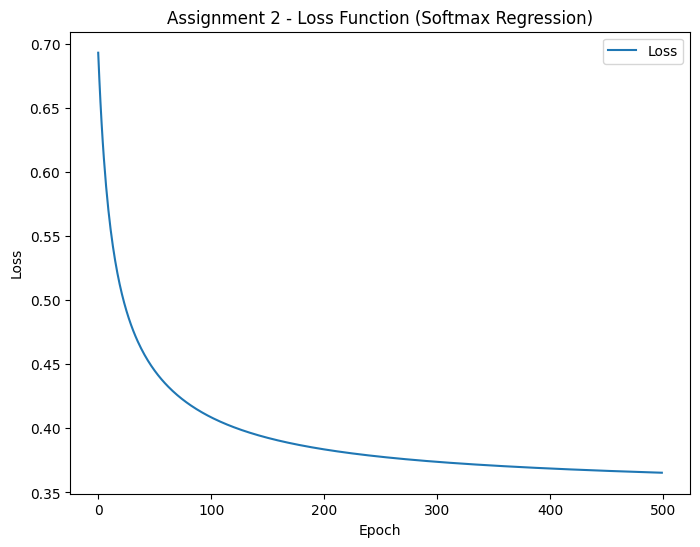

In [165]:
# Vẽ đồ thị loss function của Softmax Regression
plt.figure(figsize=(8,6))
plt.plot(softmax_reg_np.losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Assignment 2 - Loss Function (Softmax Regression)")
plt.legend()
plt.show()

ASSIGNMENT 3: Using Machine Learning Library (Scikit-Learn) for Logistic & Softmax Regression

In [166]:
# Chia dữ liệu (đã sử dụng features gốc và target)
X_sk = normalized_data[features].to_numpy()    # Không thêm bias, sklearn tự xử lý intercept
y_sk = target  # dạng 0 hoặc 1

In [167]:
print(data["Target"].value_counts())


Target
0    2215
1    2209
Name: count, dtype: int64


In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sk)
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(
    X_scaled, target, test_size=0.2, random_state=42, stratify=target
)

In [169]:
sk_log_model = SklearnLogistic(solver='lbfgs', max_iter=100)
sk_log_model.fit(X_train_sk, y_train_sk)
y_pred_sk_log = sk_log_model.predict(X_test_sk)
accuracy_sk_log = accuracy_score(y_test_sk, y_pred_sk_log)
print("Assignment 3 - Sklearn Logistic Regression Accuracy: {:.4f}".format(accuracy_sk_log))

Assignment 3 - Sklearn Logistic Regression Accuracy: 0.8282


In [170]:
# --- Softmax Regression with Scikit-Learn ---
# Đối với softmax, sử dụng LogisticRegression với multi_class='multinomial'
sk_soft_model = SklearnLogistic(multi_class='multinomial', solver='lbfgs', max_iter=100)
sk_soft_model.fit(X_train_sk, y_train_sk)
y_pred_sk_soft = sk_soft_model.predict(X_test_sk)
accuracy_sk_soft = accuracy_score(y_test_sk, y_pred_sk_soft)
print("Assignment 3 - Sklearn Softmax (Multinomial) Regression Accuracy: {:.4f}".format(accuracy_sk_soft))

Assignment 3 - Sklearn Softmax (Multinomial) Regression Accuracy: 0.8294


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
